In [1]:
import pickle
import numpy as np
import pandas as pd

import os, sys, random, math, time, socket, struct

import scipy.signal

bufferpath = "../../python/signalProc"
sys.path.append(bufferpath)
import bufhelp

In [2]:
import matplotlib.pyplot as plt
import seaborn as sn
% matplotlib inline
# m = np.asmatrix(data['data'][20])
# m = m[:, 0:9]

In [3]:
from sklearn import preprocessing
with open('Merian.pickle', 'rb') as file:
    X = pickle.load(file)
data = np.array(X['data'])
events = X['events']
data.shape


(540, 188, 37)

In [3]:
from sklearn import preprocessing
with open('Nathaly.pickle', 'rb') as file:
    X = pickle.load(file)
data1 = np.array(X['data'])
events1 = X['events']
data1.shape

(540, 188, 37)

In [7]:
nans = np.where(np.isnan(data1[150,:,1]) == True)
nans
for n in nans:
    data1[150, nans, 1] = 0.0

In [5]:
from sklearn import preprocessing
with open('Monica.pickle', 'rb') as file:
    X = pickle.load(file)
data2 = np.array(X['data'])
events2 = X['events']
data2.shape

(540, 188, 37)

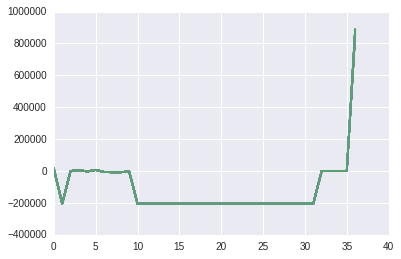

(540, 188, 37)

In [26]:
x = data1
plt.figure()
for ii, i in enumerate(range(50)):
    plt.plot(x[i][5])
plt.show()
x.shape


# Sunday

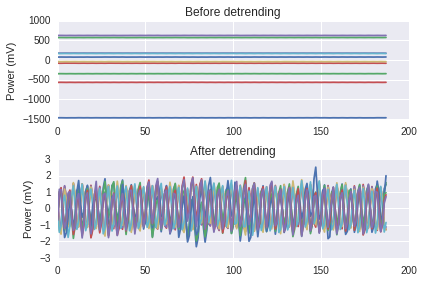

In [30]:
from scipy.signal import detrend

sample = data[200].T[:10]
fig, ax = plt.subplots(2, 1)
ax = ax.ravel()
for s in sample:
    s /= s.std(axis=0)

    ax[0].plot(s)
    ax[0].set_label('Time points (fs=250)')
    ax[0].set_ylabel('Power (mV)')
    ax[0].set_title('Before detrending')
    

import preproc
# data = preproc.detrend(data)

# sample = data[150].T[:10]

plt.figure(1)
for s in sample:
    s = detrend(s, axis=0, type='linear')
#     s /= s.std(axis=0)
    
    ax[1].plot(s)
    ax[1].set_label('Time points (fs=250)')
    ax[1].set_ylabel('Power (mV)')
    ax[1].set_title('After detrending')
plt.tight_layout()        
# fig.savefig('detrending.png')

# Sunday 

(10, 188)


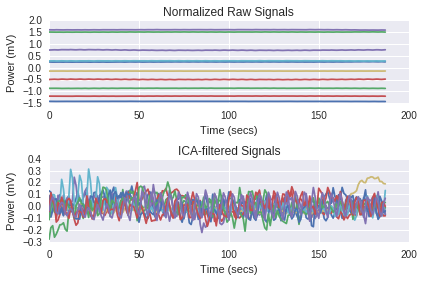

KeyboardInterrupt: 

In [31]:
# 

from sklearn.decomposition import FastICA
ica = FastICA(n_components=10, whiten=True)

ICA = []
fig, ax = plt.subplots(2,1)
ax = ax.ravel()
for d in data:
    d_ = d.T[:10]
    d_ /= d_.std(axis=0)
    print d_.shape
    S = ica.fit_transform(d_.T)
    
    ICA.append(S.T)

    for r in d_:
        ax[0].plot(r)
    ax[0].set_title('Normalized Raw Signals')
    ax[0].set_xlabel('Time (secs)')
    ax[0].set_ylabel('Power (mV)')
    

    for c in S.T:
        ax[1].plot(c)
    ax[1].set_title('ICA-filtered Signals')
    ax[1].set_xlabel('Time (secs)')
    ax[1].set_ylabel('Power (mV)')
    
    plt.tight_layout() 
#     fig.savefig('ica_raw_vs_filtered.png')
    plt.show()
    raw_input()


In [20]:
ICA = np.array(ICA)
ICA.shape

(2, 10, 188)

In [28]:
from sklearn.decomposition import FastICA
from scipy.signal import detrend

def EEGpreprocessing(data):
    ica = FastICA(n_components=10, whiten=True)
    
    data_ = []
    for d in data:
        d_ = d.T[:10]
        d_ = detrend(d_, axis=0) # detrend
        d_ /= d_.std(axis=0) # normalize
        d_ = ica.fit_transform(d_.T) # ica

        ch_ = []
        for j, ch in enumerate(d_.T): # fft
#             if j > 1 and j < 7:
            fourier = np.fft.fft(ch)
            n = len(fourier)
            real = np.absolute(fourier) 
            half = int(n / 2.)
            ch_.append(real[:half])
                         
        ch_ = np.array(ch_)
        data_.append(ch_)

    return np.array(data_)
                        

In [29]:
for participant in ['Merian', 'Monica', 'Nathaly']:
    with open('%s.pickle' % participant, 'rb') as file:
        data = pickle.load(file)
        X = data['data']
        X = np.array(X)
        PrepData = EEGpreprocessing(X)
        with open('%s_newdata.pickle' % participant, 'wb') as output_file:
            pickle.dump(PrepData, output_file)

In [30]:
X, y = None, None

for participant in ['Nathaly','Merian', 'Monica']:
    with open('%s_labels.pickle' % participant, 'rb') as label_file:
        labels = pickle.load(label_file)
        y_participant = np.array(labels['hot'])
    with open('%s_newdata.pickle' % participant, 'rb') as data_file:
        X_participant = pickle.load(data_file)
    X = X_participant if X is None else np.vstack([X, X_participant])
    y = y_participant if y is None else np.vstack([y, y_participant])
    
with open('NaMeMo_Xy.pickle', 'wb') as file:
    pickle.dump([X, y], file)

In [11]:
PrepData = EEGpreprocessing(data)
PrepData.shape

(540, 5, 94)

In [5]:
PrepData1 = EEGpreprocessing(data1)
PrepData1.shape

/home/nat/.local/lib/python2.7/site-packages/scikit_learn-0.17.1-py2.7-linux-x86_64.egg/sklearn/decomposition/fastica_.py:116: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


(540, 5, 94)

In [ ]:
PrepData2 = EEGpreprocessing(data2)
PrepData2.shape

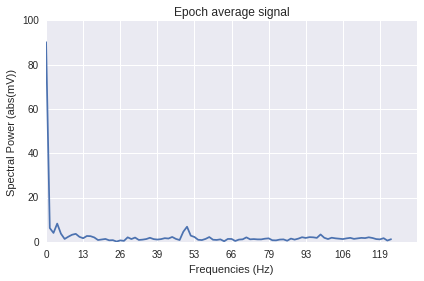

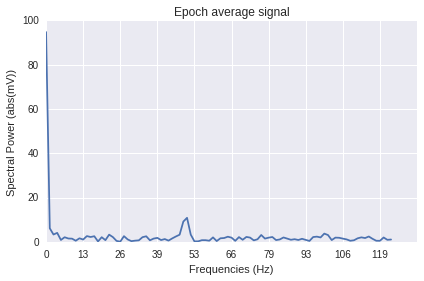

KeyboardInterrupt: 

In [34]:
plt.figure()
for d in data:
    eeg = d.T[:10,:]
    avg = np.mean(eeg, axis=0)

    fourier = np.fft.fft(avg - avg.min())
    n = fourier.size
    freq = np.fft.fftfreq(n, d=0.004)
    
    labels = [str(int(f)) for f in freq]
    
    real = np.absolute(fourier) 
    half = int(n / 2.)
    
    labels = labels[:half]
    labels_ = [labels[i] for i in range(len(labels)) if i%10==0]
    
    plt.plot(real[:half])
    plt.title('Epoch average signal')
    plt.xticks(np.arange(0, len(labels),10), labels_)
    plt.xlabel('Frequencies (Hz)')
    plt.ylabel('Spectral Power (abs(mV))')
    plt.ylim([0,100])

    plt.tight_layout()
    plt.show()
    raw_input()

# Sunday

(t:stimulus.target v:99 Rest s:312904 o:0 d:0)



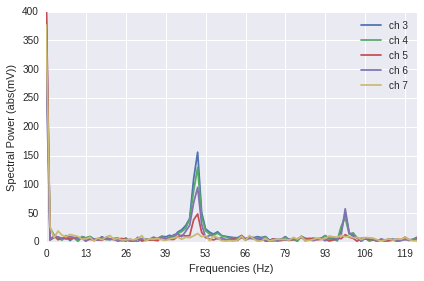

In [30]:


import seaborn as sn
fig = plt.figure()
for e, d in enumerate(data):
    if e == 11:
        print events[e]
        eeg = d.T[:10,:]
        for j, ch in enumerate(eeg):

            if j > 1 and j < 7:

                fs = ch - ch.min() 
                fourier = np.fft.fft(fs)
                n = fourier.size
                freq = np.fft.fftfreq(n, d=0.004)

                labels = [str(int(f)) for f in freq]

                real = np.absolute(fourier) 
                half = int(len(avg) / 2.)

                labels = labels[:half]
                labels_ = [labels[i] for i in range(len(labels)) if i%10==0]


                plt.plot(real[:half], label='ch '+str(j+1))
                plt.xticks(np.arange(0, len(labels),10), labels_)
                plt.xlabel('Frequencies (Hz)')
                plt.ylabel('Spectral Power (abs(mV))')
        plt.legend()
        plt.ylim([0,400])
        plt.tight_layout()
        fig.savefig('fft_epoch_rest_detrend.png')
        plt.show()
        raw_input()
    

In [121]:
import preproc
from sklearn import preprocessing

#'Merian', 'Monica', 
for participant in ['Nathaly', 'Merian', 'Monica']:
    with open('%s.pickle' % participant, 'rb') as file:
        X = pickle.load(file)
        data = []
        events = []
        for x, e in zip(X['data'], X['events']):
            data.append(np.array(x))
            events.append(e)
        data = preproc.detrend(data)
        data, badch = preproc.badchannelremoval(data)
        data, outliers = preproc.badtrailremoval(data)
        data = preproc.spatialfilter(data, type='whitten')
        data = preproc.spectralfilter(data, (0, .1, 10, 12), 1. / 250)
        
#         raw_input()
#         data = preprocessing.normalize(data, axis=0)
        
        X = []
        for d in data:
            x = preprocessing.normalize(d.T[:10], axis=0)
#             x = d.T[:10]
            X.append(x[:, -10:])
            
#         X = np.asmatrix(data)

        with open('%s_data_0.pickle' % participant, 'wb') as output_file:
            pickle.dump(X, output_file)
        
#         for d, e in zip(data, X['events']):
#             print e
#             plt.figure()
#             plt.imshow(d.T[:10,-10:])
#             plt.ylabel('channels')
#             plt.xlabel('frequencies')
#             plt.show()
#             raw_input()

KeyboardInterrupt: 

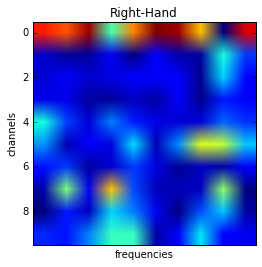

In [23]:
from sklearn import preprocessing
# x = preprocessing.normalize(X[203], axis=1)
# print x
# for i in range(20):
fig = plt.figure()
plt.imshow(X[6])
plt.title(str(events[6])[-30:-20])
plt.ylabel('channels')
plt.xlabel('frequencies')
plt.xticks([])
fig.savefig('preprocessing.png')

In [12]:
for participant in ['Merian', 'Monica', 'Nathaly']:
    with open('%s.pickle' % participant, 'rb') as file:
        data = pickle.load(file)
        X = data['data']
        data = []
        for epoch in X:
            v = epoch2vector(epoch)   
            data.append(np.squeeze(np.asarray(v)))
        X = np.asmatrix(data)
        with open('%s_data.pickle' % participant, 'wb') as output_file:
            pickle.dump(X, output_file)

NameError: name 'epoch2vector' is not defined

In [15]:
X, y = None, None

for participant in ['Nathaly','Merian', 'Monica']:
    with open('%s_labels.pickle' % participant, 'rb') as label_file:
        labels = pickle.load(label_file)
        y_participant = np.array(labels['hot'])
    with open('%s_data_0.pickle' % participant, 'rb') as data_file:
        X_participant = pickle.load(data_file)
    X = X_participant if X is None else np.vstack([X, X_participant])
    y = y_participant if y is None else np.vstack([y, y_participant])
    
with open('combined_0.pickle', 'wb') as file:
    pickle.dump([X, y], file)

In [11]:
with open('combined_0.pickle', 'rb') as file:
    X, y = pickle.load(file)
print(X.shape, y.shape)

AttributeError: 'list' object has no attribute 'shape'

In [38]:
from preproc import *

X = m

# Detrend
X = scipy.signal.detrend(X)

# CAR filter
X = np.dot(np.eye(X.shape[0]) - (1.0/X.shape[0]), X)

In [62]:
from scipy.fftpack import fft

data = fft(X[:, 0:9], axis=0)
data = np.absolute(data)
data = data[8:28]
A = data.reshape(-1, 1)
print(A.shape)
#print(amplitudes.shape)
#plt.plot(np.real(r))
#plt.plot(np.absolute(data))

(180, 1)
